In [274]:
import pandas as pd
import seaborn as sns
import os
os.environ["PATH"] += os.pathsep + 'F:/anaconda3/Library/bin/graphviz'

In [275]:
passageiros = pd.read_csv('dados/Passageiros.csv')

In [276]:
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


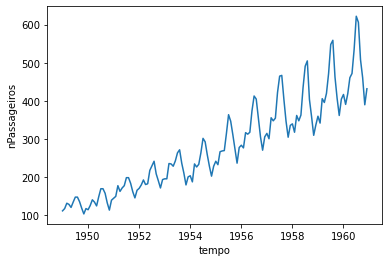

In [277]:
sns.lineplot(x='tempo', y='nPassageiros', data = passageiros)

In [278]:
tempo = passageiros.iloc[:,:-1].values

In [279]:
nPassageiros = passageiros.iloc[:,1].values

In [280]:
from sklearn.model_selection import train_test_split

In [281]:
tempo_treino, tempo_teste, nPassageiros_treino, nPassageiros_teste =  train_test_split(tempo, nPassageiros, test_size = 0.3)

In [282]:
from sklearn import linear_model

In [283]:
regressor = linear_model.LinearRegression()

In [284]:
regressor.fit(tempo_treino, nPassageiros_treino)

LinearRegression()

In [285]:
nPassageiros_predito = regressor.predict(tempo_teste)

In [286]:
import numpy as np

In [287]:
passageiros_predito = pd.DataFrame({'Tempo' : np.ndarray.flatten(tempo_teste), 'nPassageiros' : nPassageiros_predito})

In [288]:
passageiros_teste = pd.DataFrame({'Tempo' : np.ndarray.flatten(tempo_teste), 'nPassageiros' : nPassageiros_teste})

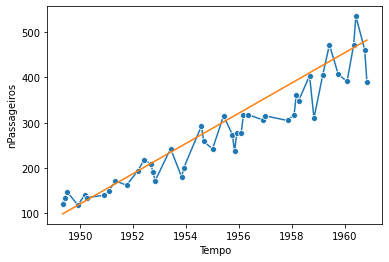

In [289]:
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_teste, marker = 'o')
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito)

In [290]:
regressor.coef_

array([33.36718073])

In [291]:
regressor.intercept_

-64944.97472357048

In [292]:
from sklearn.metrics import r2_score

In [293]:
r2_score(nPassageiros_teste, nPassageiros_predito)

0.8442042896523883

In [294]:
from sklearn.svm import SVR

In [295]:
regressor_svr = SVR(C=10000)

In [296]:
regressor_svr.fit(tempo_treino, nPassageiros_treino)

SVR(C=10000)

In [297]:
nPassageiros_predito_svr = regressor_svr.predict(tempo_teste)

In [298]:
passageiros_predito_svr = pd.DataFrame({'Tempo' : np.ndarray.flatten(tempo_teste), 'nPassageiros' : nPassageiros_predito_svr})

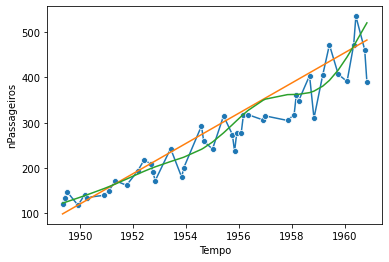

In [299]:
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_teste, marker = 'o')
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito)
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito_svr)

In [300]:
r2_score(nPassageiros_teste, nPassageiros_predito_svr)

0.8750476097220176

In [301]:
r2_score(nPassageiros_teste, nPassageiros_predito)

0.8442042896523883

# Predição Compania Telefonica (treeClassifier)

In [302]:
celular = pd.read_csv('dados/Celular.csv', delimiter=',')

In [303]:
celular.head()

,salario,economias,idade,dividas,plano
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


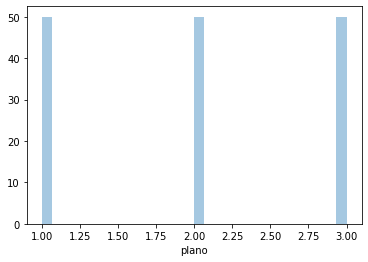

In [304]:
sns.distplot(celular.plano, bins=30, kde=False)

In [305]:
x = celular.iloc[:,:-1].values

In [306]:
y = celular.iloc[:,4].values

In [307]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3)

In [308]:
from sklearn import tree

In [309]:
classificador_arvore = tree.DecisionTreeClassifier()

In [310]:
classificador_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [311]:
import graphviz

In [312]:
dot_data = tree.export_graphviz(classificador_arvore, filled=True, out_file=None)

In [313]:
graph = graphviz.Source(dot_data)

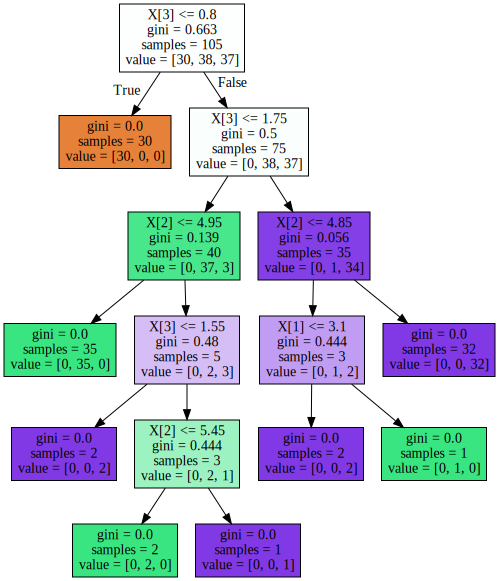

In [314]:
graph

In [316]:
plano_previsto = classificador_arvore.predict(x_teste)

In [317]:
plano_previsto

array([3, 1, 1, 2, 2, 2, 1, 3, 1, 1, 3, 1, 3, 2, 1, 1, 3, 3, 1, 2, 1, 1,
       2, 2, 3, 3, 1, 3, 2, 2, 3, 1, 2, 1, 1, 2, 1, 3, 2, 1, 1, 1, 2, 3,
       1], dtype=int64)

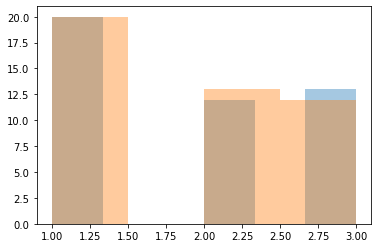

In [318]:
sns.distplot(y_teste, bins=6, kde=False)
sns.distplot(plano_previsto, bins=4, kde=False)

In [319]:
from sklearn.metrics import accuracy_score

In [321]:
accuracy_score(y_teste, plano_previsto)*100

97.77777777777777

## Classificação por k vizinhos mais próximos

In [322]:
from sklearn.neighbors import KNeighborsClassifier

In [323]:
classificador_vizinho = KNeighborsClassifier(5)


In [324]:
classificador_vizinho.fit(x_treino, y_treino)

KNeighborsClassifier()

In [326]:
plano_previsto_v = classificador_vizinho.predict(x_teste)

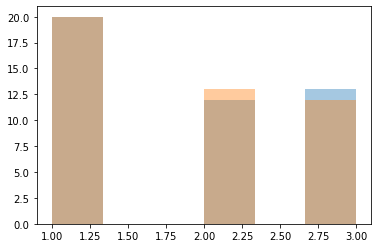

In [327]:
sns.distplot(y_teste, bins = 6, kde=False)
sns.distplot(plano_previsto_v, bins=6, kde=False)

In [328]:
accuracy_score(y_teste, plano_previsto_v)*100

97.77777777777777

## Sobreajuste e divisão em treino e teste


In [329]:
plano_previsto_v2 = classificador_vizinho.predict(x_treino)

In [331]:
accuracy_score(y_treino, plano_previsto_v2)*100

97.14285714285714

In [332]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [339]:
skfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

In [334]:
from sklearn.model_selection import GridSearchCV

In [337]:
params = {'n_neighbors' : [5]}

In [340]:
gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, cv=skfold, verbose=1, scoring='accuracy', return_train_score=True)

In [341]:
gs.fit(x,y)

Fitting 100 folds for each of 1 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=0),
             estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [5]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [342]:
gs.cv_results_['mean_test_score']

array([0.964])

# Agrupamento

In [343]:
engajamento = pd.read_csv('dados/Engajamento.csv')

In [344]:
engajamento.head()

,Horas,Taxa de Cliques,Classe
0,1007.084589,1.582099,1
1,1005.886193,1.524809,1
2,1005.609471,0.846857,1
3,989.814354,2.841944,2
4,995.328807,3.569900,3


In [345]:
x = engajamento.iloc[:,:-1]

In [346]:
x

,Horas,Taxa de Cliques
0,1007.084589,1.582099
1,1005.886193,1.524809
2,1005.609471,0.846857
3,989.814354,2.841944
4,995.328807,3.569900
...,...,...
4995,991.447007,5.428443
4996,996.841049,15.504041
4997,991.723479,4.750185
4998,996.695706,14.807956


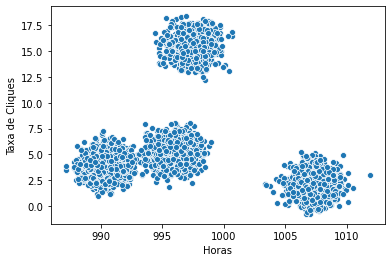

In [347]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data = x)

In [369]:
from sklearn.cluster import KMeans

In [370]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [371]:
kmeans.fit(x)

KMeans(n_clusters=2, random_state=0)

In [372]:
Kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

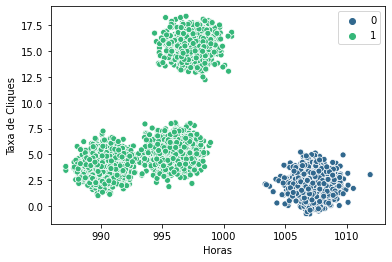

In [373]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data=x, hue=kmeans.labels_, palette='viridis')

In [374]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [375]:
kmeans.fit(x)

KMeans(n_clusters=4, random_state=0)

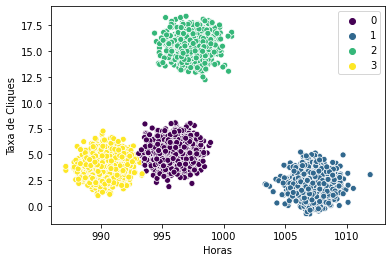

In [376]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data=x, hue=kmeans.labels_, palette='viridis')

In [377]:
from sklearn.cluster import OPTICS

In [378]:
clustering_o = OPTICS(min_samples=8).fit(x)

In [ ]:
sns.scatterplot()